In [1]:
#Jai Ganesh Deva

# DAEN - 690 Capstone Project

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Natural Language Processing Toolkit
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

import os
from matplotlib.pylab import rcParams

In [3]:
plt.style.use("dark_background")

In [4]:
#Loading the dataset into dataframe 
os.chdir("E:\DAEN - 690")
bijli = pd.read_csv("Electronics_anatomical_features.csv")

In [5]:
bijli.index = np.arange(1,len(bijli) + 1)

In [6]:
bijli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 1 to 26365
Data columns (total 21 columns):
reviewerID                 26365 non-null object
asin                       26365 non-null object
reviewerName               26365 non-null object
helpful                    26365 non-null object
unixReviewTime             26365 non-null int64
reviewText                 26365 non-null object
overall                    26365 non-null int64
reviewTime                 26365 non-null object
summary                    26365 non-null object
upvote                     26365 non-null int64
total_votes                26365 non-null int64
No.of Characters           26365 non-null int64
Number of Sentences        26365 non-null int64
No.of Question Marks       26365 non-null int64
No.of Exclamation Marks    26365 non-null int64
no.of Capital              26365 non-null int64
FRE                        26365 non-null float64
ARI                        26365 non-null float64
helpful_rating  

In [7]:
bijli.describe()

,unixReviewTime,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating
count,2.636500e+04,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000
mean,1.268155e+09,3.643543,58.599734,68.412630,1635.281927,18.050332,0.550465,1.359075,10.523876,74.237199,7.969611,0.747340
std,9.463474e+07,1.533671,276.069625,285.955755,1814.491723,18.605920,1.444861,3.106903,17.763067,11.205630,3.514912,0.267691
min,9.395136e+08,1.000000,0.000000,10.000000,19.000000,1.000000,0.000000,0.000000,0.000000,-197.330000,-2.100000,0.000000
25%,1.195258e+09,2.000000,9.000000,13.000000,545.000000,7.000000,0.000000,0.000000,2.000000,68.200000,6.100000,0.636364
50%,1.290816e+09,4.000000,15.000000,21.000000,1068.000000,12.000000,0.000000,0.000000,5.000000,74.290000,7.700000,0.852941
75%,1.347581e+09,5.000000,32.000000,43.000000,2058.000000,22.000000,1.000000,2.000000,12.000000,81.160000,9.400000,0.939394
max,1.405901e+09,5.000000,30735.000000,31453.000000,25560.000000,382.000000,35.000000,74.000000,513.000000,133.780000,139.800000,1.000000


In [8]:
#Data Cleaning

In [9]:
bijli["review"] = bijli["review"]

In [10]:
bijli["review"][1]

"An eReader without e-ink? Really?eReaders are devices dedicated to reading, and thus the main inconvenience they should avoid is eye-strain.By introducing a backlit eBook, B&N; removed the key point of eReaders.If you need a device that has a backlit screen (and can afford a $283 device), why wouldn't you pay the extra $200 to get an iPad, which does the job much more efficiently?Please, correct me if I'm wrong, because I really don't get the point of this device.Thanks. Why Would You Want To Do That?"

In [11]:
#Dropping Rendundant features
bijli = bijli.drop(["reviewerName","reviewTime","reviewText","summary","unixReviewTime","helpful"], axis = 1)

In [12]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,An eReader without e-ink? Really?eReaders are ...


In [13]:
bijli.review[1]

"An eReader without e-ink? Really?eReaders are devices dedicated to reading, and thus the main inconvenience they should avoid is eye-strain.By introducing a backlit eBook, B&N; removed the key point of eReaders.If you need a device that has a backlit screen (and can afford a $283 device), why wouldn't you pay the extra $200 to get an iPad, which does the job much more efficiently?Please, correct me if I'm wrong, because I really don't get the point of this device.Thanks. Why Would You Want To Do That?"

In [14]:
bijli["review"] = bijli["review"].replace('[^A-Za-z0-9]+'," ",regex = True)

# Visualization 

In [16]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.style.use("dark_background")


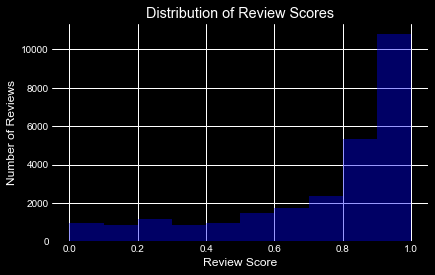

In [17]:
#Distribution of Review score
plt.figure()
plt.hist(bijli["helpful_rating"],facecolor = "blue",alpha = 0.4)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")

plt.show()


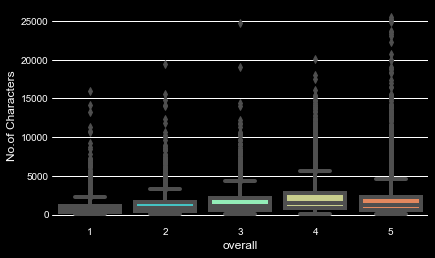

In [18]:
#Ratings vs No of characters
sns.boxplot(x='overall',y='No.of Characters',data=bijli,palette="rainbow",saturation= 0.7)


In [19]:
overall = bijli.groupby('overall').mean()
overall

,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
overall,,,,,,,,,,,
1,28.515792,46.677123,924.325224,11.431285,0.584294,1.184806,5.943875,75.103803,7.449488,0.541578,0.466923
2,29.119963,44.067010,1319.753515,14.941425,0.618557,0.988285,7.551546,74.363112,7.855248,0.551962,0.496720
3,56.622991,69.377009,1606.717331,17.553809,0.614256,0.930818,9.748428,74.380000,8.021733,0.655542,0.656883
4,74.468424,81.468629,2119.018598,22.661557,0.592888,1.185162,12.920090,73.477292,8.284958,0.824139,0.876967
5,69.786768,75.805598,1781.143596,19.450636,0.491603,1.671586,12.075997,74.150678,8.053511,0.854897,0.913401


In [20]:
overall.corr()

,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
upvote,1.000000,0.994717,0.933430,0.937147,-0.466098,0.470121,0.977130,-0.806227,0.867267,0.960094,0.970928
total_votes,0.994717,1.000000,0.914433,0.917633,-0.418169,0.417533,0.954299,-0.776076,0.845841,0.931553,0.944229
No.of Characters,0.933430,0.914433,1.000000,0.999512,-0.242310,0.271139,0.976978,-0.960400,0.980910,0.883375,0.901215
Number of Sentences,0.937147,0.917633,0.999512,1.000000,-0.258128,0.290582,0.979933,-0.960475,0.974879,0.892381,0.908685
No.of Question Marks,-0.466098,-0.418169,-0.242310,-0.258128,1.000000,-0.985598,-0.436820,0.093429,-0.127065,-0.654806,-0.626169
No.of Exclamation Marks,0.470121,0.417533,0.271139,0.290582,-0.985598,1.000000,0.456897,-0.155473,0.142265,0.675322,0.641730
no.of Capital,0.977130,0.954299,0.976978,0.979933,-0.436820,0.456897,1.000000,-0.897275,0.930473,0.961656,0.972593
FRE,-0.806227,-0.776076,-0.960400,-0.960475,0.093429,-0.155473,-0.897275,1.000000,-0.959326,-0.772590,-0.788386
ARI,0.867267,0.845841,0.980910,0.974879,-0.127065,0.142265,0.930473,-0.959326,1.000000,0.797807,0.823431
helpful_rating,0.960094,0.931553,0.883375,0.892381,-0.654806,0.675322,0.961656,-0.772590,0.797807,1.000000,0.998544


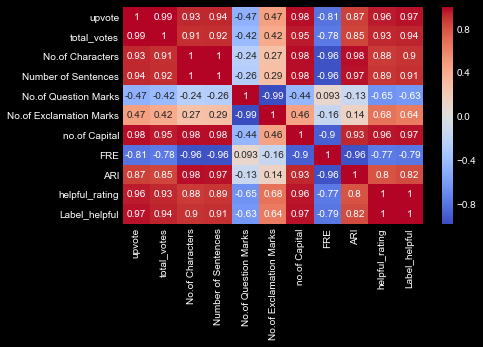

In [21]:
sns.heatmap(overall.corr(),cmap='coolwarm',annot=True)

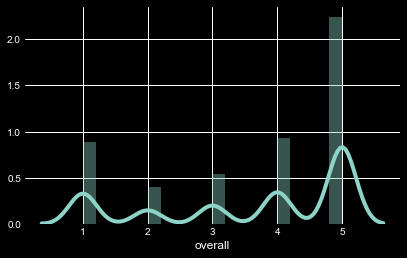

In [22]:
sns.distplot(bijli["overall"])

# TFIDF Matrix 
 
 We will only be doing Tokenization, Stemming and Stopwords removal.

In [59]:
from nltk.stem.snowball import SnowballStemmer

In [60]:
stemmer = SnowballStemmer("english")


In [61]:
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vect = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01,lowercase = False)

In [28]:
%time bow = vect.fit_transform(bijli["review"])

Wall time: 1min 58s


In [62]:
bow = bow.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [64]:
bow_mod = pd.DataFrame(bow)

In [65]:
bow_mod.columns = vect.get_feature_names()

In [66]:
bow_mod.head()

,0,00,000,1,10,100,1000,1080p,10x,11,...,xp,xt,yeah,year,yellow,yes,yesterday,youtub,zero,zoom
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.02937,0.0,0.0,0.0,0.0,0.0,0.0
2,0.045097,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.051779,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
bow_mod["FRE"] = bijli["FRE"]
bow_mod["ARI"] = bijli["ARI"]
bow_mod["No.of Characters"] = bijli["No.of Characters"]
bow_mod["overall"] = bijli["overall"]
#bow_mod["reviewerID"] = bijli["reviewerID"]
#bow_mod["asin"] = bijli["asin"]
bow_mod["No.of Exclamation Marks"] = bijli["No.of Exclamation Marks"]

In [27]:
bow_mod.drop(0,inplace = True)

In [69]:
bow_mod = np.array(bow_mod)

In [30]:
bijli.loc[bijli.Label_helpful == True, 'Label_helpful']= 1

In [31]:
bijli.loc[bijli.Label_helpful == False, 'Label_helpful']= 0

In [31]:
bijli["Label_helpful"].drop(1,inplace = True)

In [70]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow_mod,bijli['Label_helpful'], test_size=0.3, random_state=101)

# Machine Learning Models

We have implemented the following ML models.

1) Random Forest
2) Logistic Regression
3) Support Vector Machine
4) Decision Tree
5) Bagging
6) RNN & LSTM networks

# Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
from sklearn import metrics

In [111]:
rfclf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [112]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
probs = rfclf.predict_proba(X_test)

In [114]:
pred = probs[:,1]

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
from sklearn.metrics import roc_curve

In [118]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [119]:
roc_auc = metrics.auc(fpr, tpr)

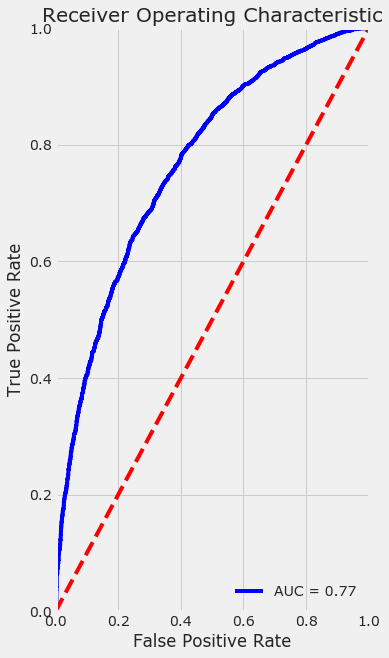

In [120]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 10, 25
plt.show()

In [ ]:
y_test.shape

# Logsitic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lm = LogisticRegression()

In [94]:
print(X_test)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.08500000e+03
    4.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.92000000e+02
    5.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.39600000e+03
    3.00000000e+00   1.00000000e+00]
 ..., 
 [  0.00000000e+00   1.06935073e-01   0.00000000e+00 ...,   2.44000000e+02
    5.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.90000000e+02
    3.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.82100000e+03
    4.00000000e+00   0.00000000e+00]]


In [95]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
probs = lm.predict_proba(X_test)

In [97]:
pred = probs[:,1]

In [98]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [99]:
roc_auc = metrics.auc(fpr, tpr)

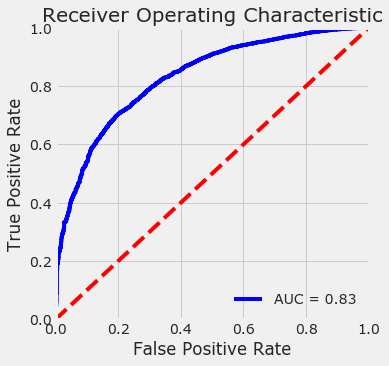

In [100]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 5,5
plt.show()

In [ ]:
#accuracy_score(pred,y_test)

In [ ]:
accuracy_score(pred,y_test)

In [ ]:
plt.scatter(bow_mod, df["class_num"])
plt.plot(df["measurement"], model.predict_proba(X)[:, 1], color="r")
plt.xlabel("Measurement")
plt.ylabel("Probability of being in class B")
plt.show()

print "Accuracy", model.score(X, y)

# Linear SVM

In [35]:
from sklearn import svm

In [36]:
from sklearn.svm import LinearSVC

In [37]:
from sklearn.metrics import classification_report

In [38]:
from sklearn.svm import SVC

In [125]:
svm_clf = LinearSVC(C = 1,loss = "hinge")

In [126]:
svm_clf.fit(X_train,y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [127]:
pred = svm_clf.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(pred,y_test)

0.80644753476611886

In [40]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

      False       0.37      0.67      0.48      1053
       True       0.94      0.83      0.88      6857

avg / total       0.87      0.81      0.83      7910



In [97]:
y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)

# Radial Basis Function

In [39]:
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001)

In [40]:
rbf_kernel_svm_clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
pred = rbf_kernel_svm_clf.predict(X_test)

In [44]:
accuracy_score(y_test,pred)

0.76131479140328695

In [45]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00         0
       True       1.00      0.76      0.86      7910

avg / total       1.00      0.76      0.86      7910



C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Polynomial SVM

In [72]:
poly_clf = SVC(kernel="poly", degree=3, coef0=1, C=5)

In [ ]:
poly_clf.fit(X_train,y_train)

In [ ]:
pred = poly_clf.predict(X_test)

In [ ]:
accuracy_score(pred,y_test)

In [46]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00         0
       True       1.00      0.76      0.86      7910

avg / total       1.00      0.76      0.86      7910



C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Decision Tree

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.metrics import roc_curve

In [49]:
from sklearn import metrics

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree_clf = DecisionTreeClassifier()

In [53]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
probs = tree_clf.predict_proba(X_test)

In [190]:
prediction = probs[:,1]

In [191]:
fpr, tpr, threshold = roc_curve(y_test, prediction)

In [192]:
roc_auc = metrics.auc(fpr, tpr)

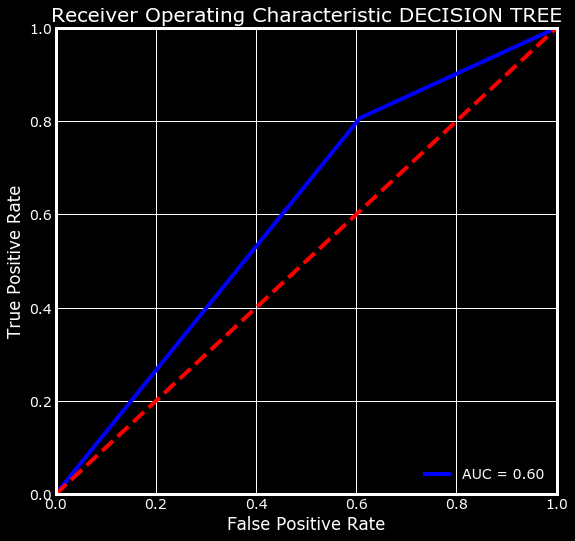

In [193]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic DECISION TREE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 5, 10
plt.show()

In [253]:
accuracy_score(pred,y_test)

0.71504424778761067

# Bagging

In [172]:
#Bagging

In [173]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [174]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)

In [175]:
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [60]:
probs = bag_clf.predict_proba(X_test)

In [176]:
prediction = probs[:,1]

In [178]:
fpr, tpr, threshold = roc_curve(y_test, prediction)

In [179]:
roc_auc = metrics.auc(fpr, tpr)

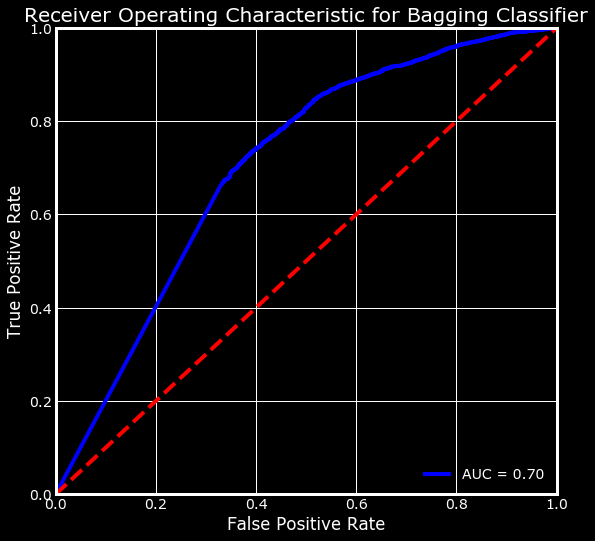

In [181]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Bagging Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [61]:
accuracy_score(pred,y_test)

0.76359039190897593

# Boosting

# Naive Bayes Classifier

In [217]:
from sklearn.naive_bayes import GaussianNB

In [218]:
NB_clf = GaussianNB()

In [219]:
NB_clf.fit(X_train,y_train)

GaussianNB(priors=None)

In [220]:
probs = NB_clf.predict_proba(X_test)

In [221]:
pred = probs[:,1]

In [222]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [223]:
roc_auc = metrics.auc(fpr, tpr)

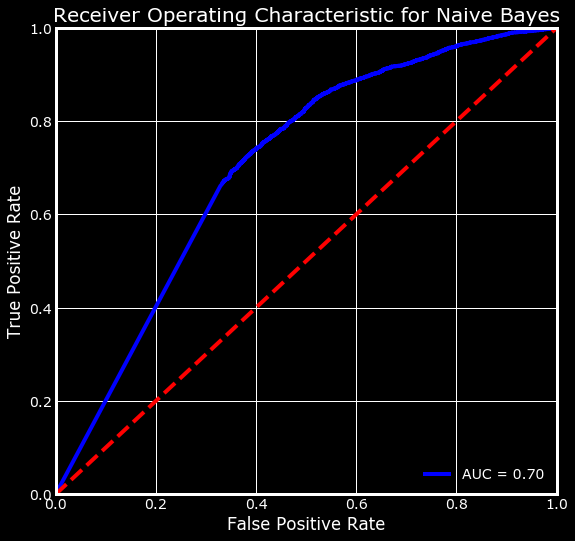

In [224]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [ ]:
# Multinomial Naive Bayes

In [210]:
from sklearn.naive_bayes import MultinomialNB

In [211]:
mnb_clf = MultinomialNB().fit(X_train, y_train)

In [212]:
probs  = mnb_clf.predict_proba(X_test)

In [213]:
prediction = probs[:,1]

In [214]:
fpr, tpr, threshold = roc_curve(y_test, prediction)

In [215]:
roc_auc = metrics.auc(fpr, tpr)

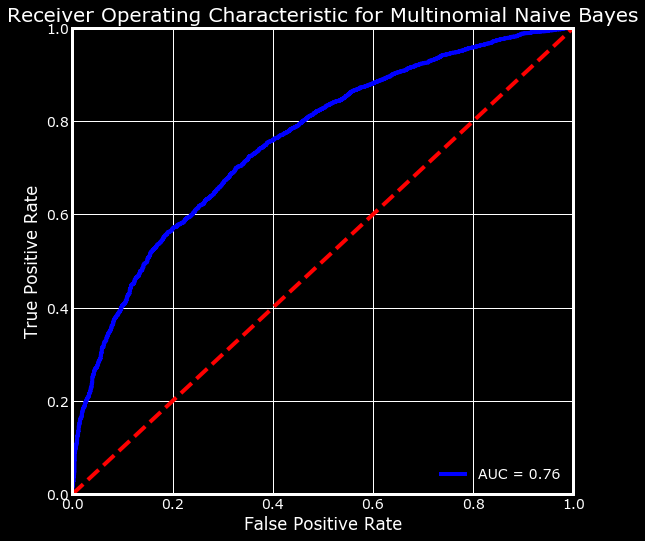

In [216]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Multinomial Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

# Multi - layer Perceptron 

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [226]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [227]:
from sklearn.neural_network import MLPClassifier

In [228]:
mlp = MLPClassifier(hidden_layer_sizes=(125,125,125))


In [229]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(125, 125, 125), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [230]:
probs = mlp.predict_proba(X_test)

In [231]:
predictions = probs[:,1]

In [232]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

In [233]:
roc_auc = metrics.auc(fpr, tpr)

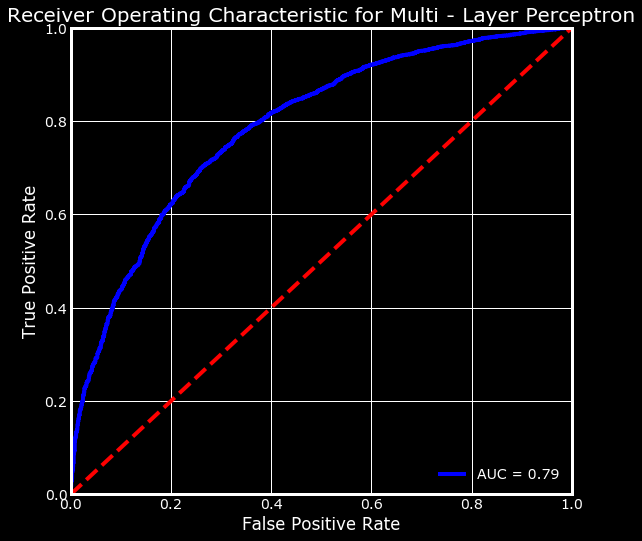

In [237]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Multi - Layer Perceptron')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [1]:
def plot_svm(N=10, ax=None):
    
    X = X_train
    y = y_train
    model = LinearSVC(C= 1, loss ="hinge")
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

NameError: name 'plt' is not defined

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)